# Project 11 -- [Pavan Kumar] [battula]

**TA Help:** N/A
    
**Collaboration:** N/A
    

## Question 1

In [2]:
library(data.table)
options(jupyter.rich_display = F)
options(repr.matrix.max.cols=30, repr.matrix.max.rows=200)

In [3]:
orders <- fread("/anvil/projects/tdm/data/restaurant/orders.csv")

In [8]:
head(orders$created_at)

[1] "2019-08-01 05:30:16 UTC" "2019-08-01 05:31:10 UTC"
[3] "2019-08-01 05:31:33 UTC" "2019-08-01 05:34:54 UTC"
[5] "2019-08-01 05:35:51 UTC" "2019-08-01 05:37:05 UTC"

In [6]:
format(head(orders$created_at), "%m-%d-%Y")

[1] "08-01-2019" "08-01-2019" "08-01-2019" "08-01-2019" "08-01-2019"
[6] "08-01-2019"

In [4]:
length(unique(year(orders$created_at)))

[1] 2

In [9]:
day_of_week <- weekdays(orders$created_at)

In [21]:
table_result <- table(day_of_week)

In [22]:
table_result

day_of_week
   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    15906     19676     16238     18651     22210     22003     20619 

In [23]:
result_df <- as.data.frame(table_result)

In [26]:
head(result_df)

  day_of_week Freq 
1 Friday      15906
2 Monday      19676
3 Saturday    16238
4 Sunday      18651
5 Thursday    22210
6 Tuesday     22003

In [10]:
weekday_counts <- table(wday(orders$created_at))

In [11]:
weekday_counts # 1-sunday, 2-monday, 3-tuesday, 4-friday, 5-thurday, 6-friday, 7-saturday


    1     2     3     4     5     6     7 
18651 19676 22003 20619 22210 15906 16238 

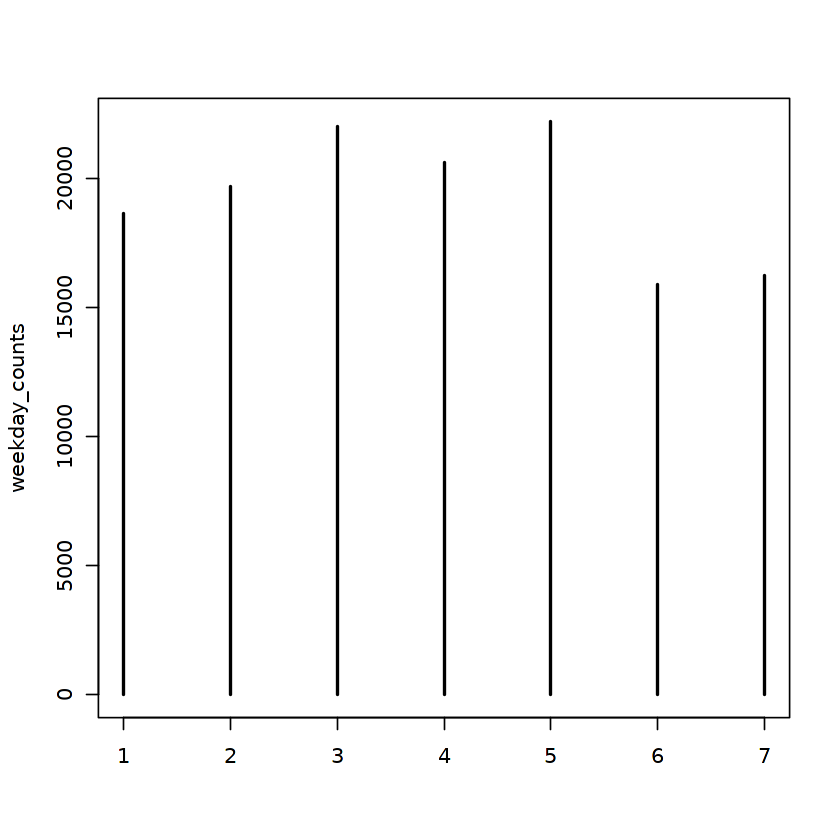

In [83]:
plot(weekday_counts)

The data indicates varying counts for a certain variable across different days of the week. Specifically, Thursday has the highest count at 22,210, while Sunday has the lowest count at 18,651.

## Question 2

In [91]:
head(sort(table(orders$vendor_id), decreasing=TRUE)) 


 113  105   79   84   78   83 
7807 5562 5117 5001 4643 3684 

In [44]:
head(sort(table(orders$vendor_id[year(orders$created_at) ==2019 ]), decreasing=TRUE), n=5)


 113   78  105   83   79 
5935 4643 4513 3639 3193 

In [45]:
head(sort(table(orders$vendor_id[year(orders$created_at) ==2020 ]), decreasing=TRUE), n=5)


 846   84   79  113  386 
2556 2141 1924 1872 1160 

In [22]:
orders_2019 <- orders[year(orders$created_at) == 2019, ]

In [23]:
top_5_vendors <- head(sort(table(orders_2019$vendor_id), decreasing = TRUE), n = 5)

In [24]:
top_5_orders <- orders_2019[orders_2019$vendor_id %in% names(top_5_vendors), ]

In [40]:
average_per_vendor <- aggregate(grand_total ~ vendor_id, data = top_5_orders, FUN = mean)

In [41]:
average_per_vendor

  vendor_id grand_total
1  78       12.93651   
2  79       11.99903   
3  83       17.87694   
4 105       13.42989   
5 113       14.47173   

In [47]:
orders_2020 <- orders[year(orders$created_at) == 2020, ]

In [48]:
top_5_vendors_20 <- head(sort(table(orders_2020$vendor_id), decreasing = TRUE), n = 5)

In [58]:
top_5_vendors_20 


 846   84   79  113  386 
2556 2141 1924 1872 1160 

In [56]:
average_per_vendor_20 <- aggregate(grand_total ~ vendor_id, data = top_5_orders_20, FUN = mean)

In [57]:
average_per_vendor_20

  vendor_id grand_total
1  79       14.05936   
2  84       17.77034   
3 113       15.21175   
4 386       12.39578   
5 846       11.92680   

Vendors 846 and 113, as well as Vendors 84 and 386, seem to have similar total amount patterns, suggesting possible correlations or shared market dynamics.
Vendors 79 and 113 have relatively lower total amounts, with Vendor 79 showing more fluctuation.
There is a general decreasing trend in total amounts for all vendors over the years, indicating a potential overall shift in the market or changes in business conditions.

## Question 3

In [28]:
orders$created_at <- as.POSIXct(orders$created_at, format = "%Y-%m-%d %H:%M:%S", tz = "UTC")

In [29]:
order_hours <- format(orders$created_at, "%H")

In [30]:
orders_after_5pm <- sum(as.numeric(order_hours) >= 17)

In [31]:
orders_after_5pm

[1] 74782

In [32]:
orders_before_5pm <- sum(as.numeric(order_hours) < 17)

In [33]:
orders_before_5pm

[1] 60521

In [34]:
library(ggplot2)

In [38]:
ggplot(orders, aes(x =resuly_df$week_of_day , y = orders_before_5pm, fill = orders_after_5pm)) + geom_col(position = "dodge") + labs(title = "Number of Orders Before and After 5 pm by Day of the Week",
       x = "Day of the Week",
       y = "Number of Orders") +
  scale_fill_manual(values = c("before_5pm" = "blue", "after_5pm" = "red"), name = "Order Time", labels = c("Before 5 pm", "After 5 pm")) + theme_minimal()

ERROR while rich displaying an object: Error in `geom_col()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error:
! object 'resuly_df' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handle

## Question 4

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"


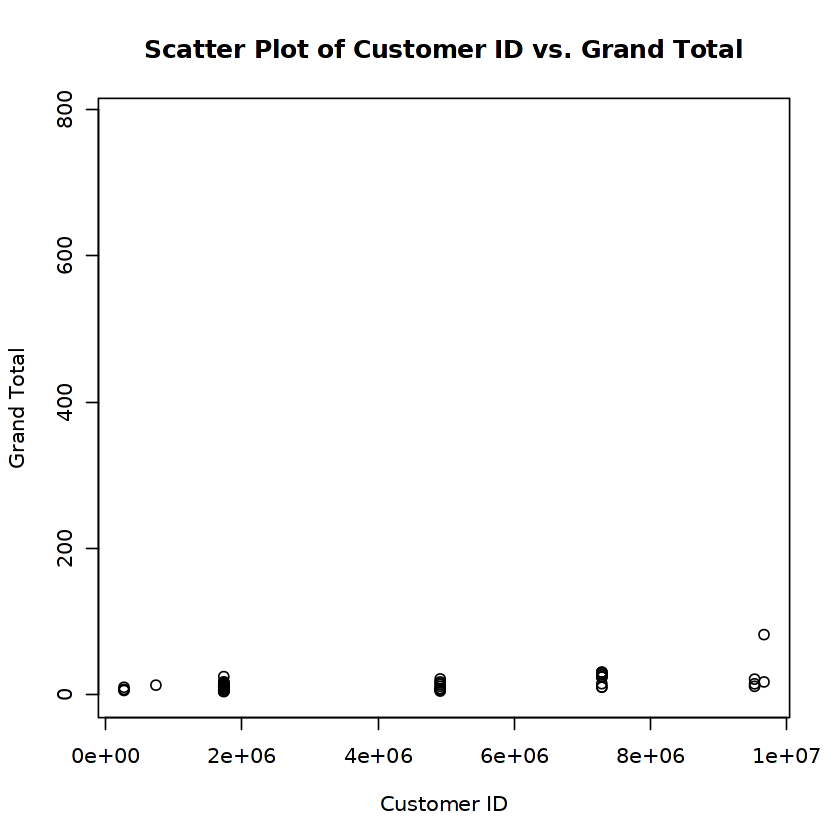

In [4]:
plot(orders$customer_id, orders$grand_total, 
     main = "Scatter Plot of Customer ID vs. Grand Total",
     xlab = "Customer ID",
     ylab = "Grand Total")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"


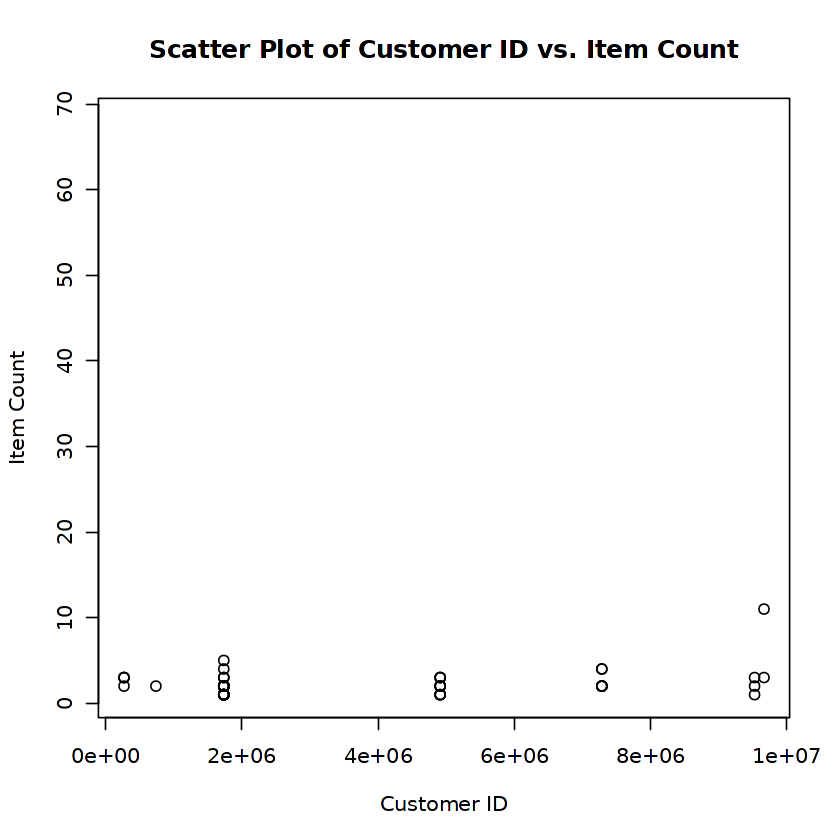

In [8]:
plot(orders$customer_id, orders$item_count, main = "Scatter Plot of Customer ID vs. Item Count",
     xlab = "Customer ID", ylab = "Item Count")

The plot visualizes the relationship between customer IDs and the number of items in an order, with each point representing a unique customer's order. Scatter plots are chosen for this comparison to reveal potential patterns or trends in item counts across different customer IDs, allowing for a quick assessment of the data's distribution and any potential outliers or clusters.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"


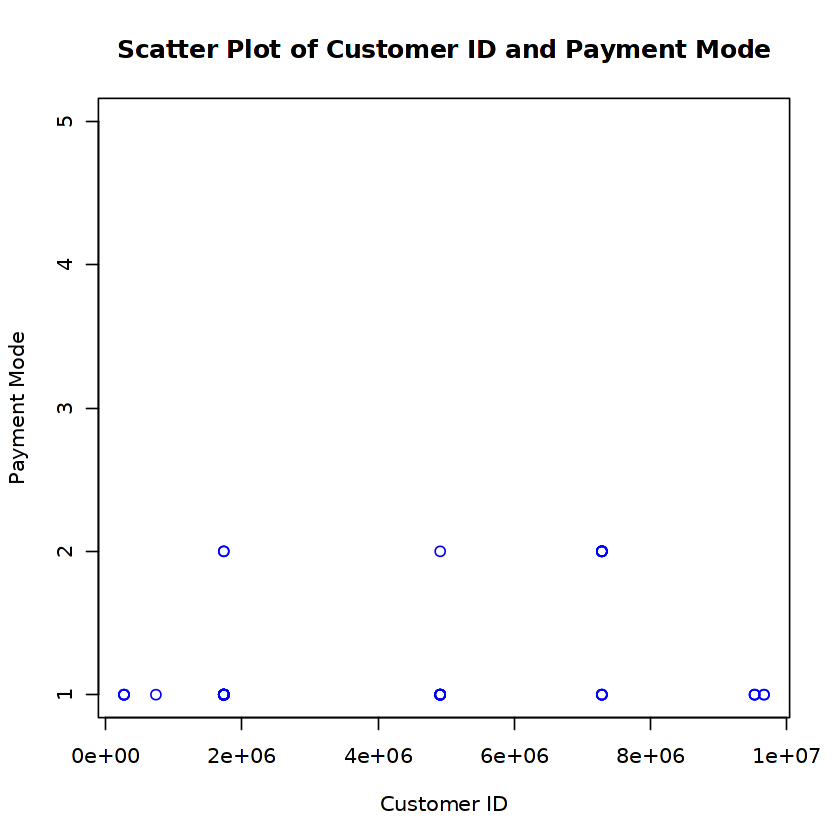

In [11]:
plot(orders$customer_id, orders$payment_mode,
     main = "Scatter Plot of Customer ID and Payment Mode",
     xlab = "Customer ID", ylab = "Payment Mode",
     col = "blue")

a scatter plot might not be the most appropriate choice for visualizing the relationship between customer_id and payment_mode since payment_mode is likely a categorical variable. A bar plot or a stacked bar plot would be more suitable for displaying the distribution of payment modes among different customer IDs, allowing for clearer interpretation of the data.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.